### NINO 3.4

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import sys
import pathlib

In [3]:
import pandas as pd
import numpy as np
from dateutil import parser as dparser
from datetime import datetime, timedelta
import subprocess

In [4]:
clim_start = 1981
clim_end = 2010

### Get the NINO 3.4 INDEX, based on the ERSST V5 SST dataset 

In [5]:
NINO_url = 'http://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.81-10.ascii'

In [6]:
nino = pd.read_csv(NINO_url, sep='\s+', engine='python')

In [7]:
nino.columns

Index(['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2',
       'NINO3.4', 'ANOM.3'],
      dtype='object')

In [8]:
nino.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
844,2020,5,24.28,0.01,26.92,-0.24,29.00,0.26,27.65,-0.16
845,2020,6,22.42,-0.59,25.93,-0.57,29.09,0.30,27.38,-0.21
846,2020,7,20.69,-1.24,25.21,-0.48,28.89,0.15,26.98,-0.20
847,2020,8,19.97,-1.05,24.50,-0.60,28.48,-0.17,26.27,-0.57
848,2020,9,19.54,-1.20,23.93,-1.00,28.28,-0.38,25.96,-0.77


In [9]:
nino = nino[['YR','MON','NINO3.4']]

In [10]:
nino.tail()

,YR,MON,NINO3.4
844,2020,5,27.65
845,2020,6,27.38
846,2020,7,26.98
847,2020,8,26.27
848,2020,9,25.96


In [11]:
nino.loc[:,'DAY'] = 1

In [12]:
nino_clim = nino.copy()

In [13]:
nino_clim.index = nino_clim.YR

In [14]:
nino_clim = nino_clim.loc[1981:2010,:]

In [15]:
nino_clim = nino_clim.groupby(nino_clim.MON).mean()

### get a proper datetime index from the `[['YR', 'MON', 'DAY']]` columns

In [16]:
nino.index = nino[['YR', 'MON', 'DAY']].apply(lambda d : datetime(*d), axis = 1)

In [17]:
nino.tail()

,YR,MON,NINO3.4,DAY
2020-05-01,2020,5,27.65,1
2020-06-01,2020,6,27.38,1
2020-07-01,2020,7,26.98,1
2020-08-01,2020,8,26.27,1
2020-09-01,2020,9,25.96,1


### anomalies WRT to the climatology defined above (1981 - 2010)

In [18]:
def demean(x): 
    return x - x.loc[str(clim_start):str(clim_end)].mean()

In [19]:
nino['anoms'] = nino.groupby(nino.MON)[['NINO3.4']].transform(demean)

<AxesSubplot:>

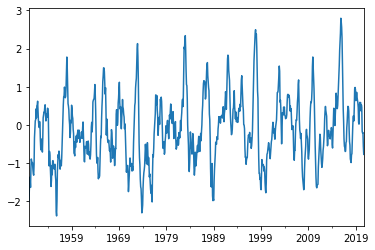

In [20]:
nino.anoms.plot()

In [21]:
ninos = nino[['anoms']]
ninos.columns = ['NINO34']

In [22]:
nino.tail()

,YR,MON,NINO3.4,DAY,anoms
2020-05-01,2020,5,27.65,1,-0.162000
2020-06-01,2020,6,27.38,1,-0.211000
2020-07-01,2020,7,26.98,1,-0.198667
2020-08-01,2020,8,26.27,1,-0.564000
2020-09-01,2020,9,25.96,1,-0.767333


### selects only the anomalies 

In [23]:
nino  = nino.loc[:,['anoms']]

In [24]:
nino.columns = ['NINO34']

### offset to end of month 

In [25]:
nino.index = nino.index + pd.offsets.MonthEnd(0) 

In [26]:
opath = pathlib.Path("/media/nicolasf/END19101/data/observational_indices/NINO34")

In [27]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [28]:
nino.index.name = 'date'

In [31]:
nino.index = nino.index + pd.offsets.MonthEnd(0)

### calculates the seasonal anomalies 

In [34]:
nino = nino.rolling(window=3, min_periods=3).mean() 

In [35]:
nino = nino.iloc[2:,:]

In [36]:
nino.to_csv(opath.joinpath("NINO34.csv"))